#  Airbnb New York EDA and Housing Price Prediction

Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.The company is based in San Francisco, California, United States.

The dataset provided hereby gives us information about pricing and other features of Airbnb New York Market. In this project we will use the features given in the dataset to form exploratory data analysis and also to predict the housing prices.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import csv
import os
import seaborn as sns
warnings.filterwarnings('ignore') #used to handle warnings and filterwarnings('ignore') is used to ignore the warnings


In [2]:
#Importing the dataset
Airbnb=pd.read_csv("D:\\Python\\AB_NYC_2019.csv")

In [3]:
#Data Exploration
Airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
Airbnb.shape

(48895, 16)

In [5]:
Airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
Airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In total our dataset has 48895 rows and 16 columns. 
Columns present are:

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365

Let us now explore the dataset more.

In [7]:
Airbnb.describe() #This will show us the count, mean, std, min, 25% 50%, 75%, and a max of each column in the dataset.

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
Airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [9]:
Airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [10]:
Airbnb['neighbourhood'].nunique()

221

In [11]:
Airbnb['host_id'].nunique()

37457

In [12]:
Airbnb.groupby('neighbourhood_group').price.agg(['mean','max','min'])

,mean,max,min
neighbourhood_group,,,
Bronx,87.496792,2500,0
Brooklyn,124.383207,10000,0
Manhattan,196.875814,10000,0
Queens,99.517649,10000,10
Staten Island,114.812332,5000,13


SOME CONCLUSIONS:

1)The most frequent neighbourhood groups are Manhattan and Brooklyn. The reason behind this is that most touristy destinations are in these two main places.

2)The average price of Airbnb Housing in New York is 152 Dollars. 

3)On an average Manhattan is the most expensive neighourhood group followed by Brooklyn,Staten Islands,Queens,Bronx

4)The total number of unique neighbourhoods are 221.

5)Maximum number of time people have given up their entire home/apartment for Airbnb services followed by private room.

6) The number of unique hosts are 37457

In [13]:
#Handling Null Values

In [14]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [15]:
Airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
#Maximum Number of Missing Values are in last_review and reviews_per_month

In [17]:
#Now in order to replace null values, I replace them with values that are appropriate for each column. 
#My goal is to make sure that no column contains no null values.

In [18]:
Airbnb.fillna({'reviews_per_month':0},inplace=True)
Airbnb.fillna({'name':"No Name"},inplace=True)
Airbnb.fillna({'host_name':"No Host Name"},inplace=True)
Airbnb.fillna({'last_review':"No Review"},inplace=True)

In [19]:
Airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [20]:
#Data Visualization

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

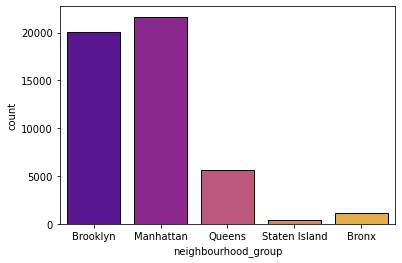

In [21]:
#Different Neighbourhood Groups
sns.countplot(x=Airbnb['neighbourhood_group'],data=Airbnb,palette='plasma',edgecolor='black')

<BarContainer object of 10 artists>

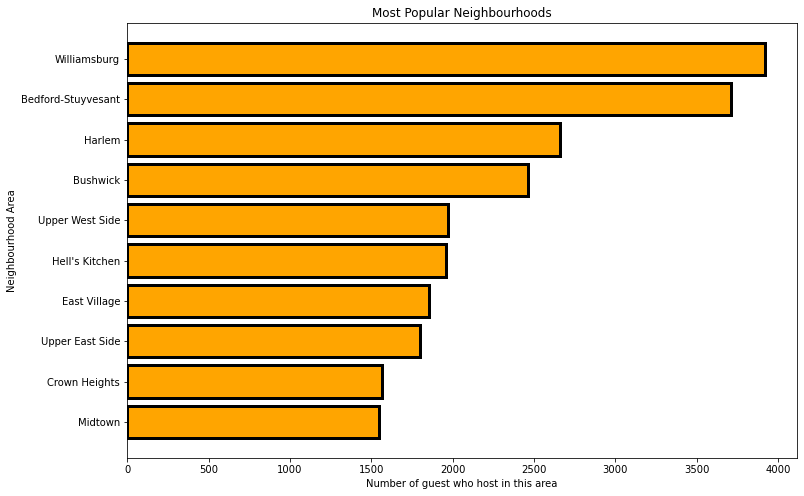

In [22]:
#Most Popular Neighbourhood
ngd=Airbnb.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12,8))
x=list(ngd.index)
y=list(ngd.values)
x.reverse()
y.reverse()

plt.title('Most Popular Neighbourhoods')
plt.xlabel('Number of guest who host in this area')
plt.ylabel('Neighbourhood Area')

plt.barh(x,y,color='orange',edgecolor='black',lw=3)

Text(0.5, 1.0, 'Price V/S Room Types')

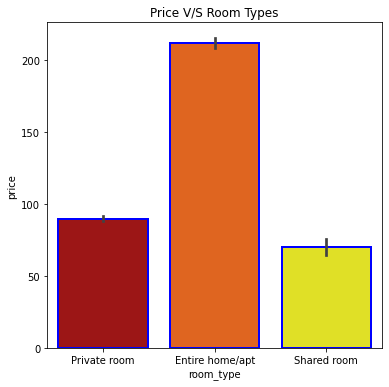

In [23]:
#Relationship between Prices and Room types
plt.figure(figsize=(6,6))
sns.barplot(data=Airbnb,y=Airbnb['price'],x=Airbnb['room_type'],palette='hot',edgecolor='blue',lw=2)
plt.title('Price V/S Room Types')


<AxesSubplot:>

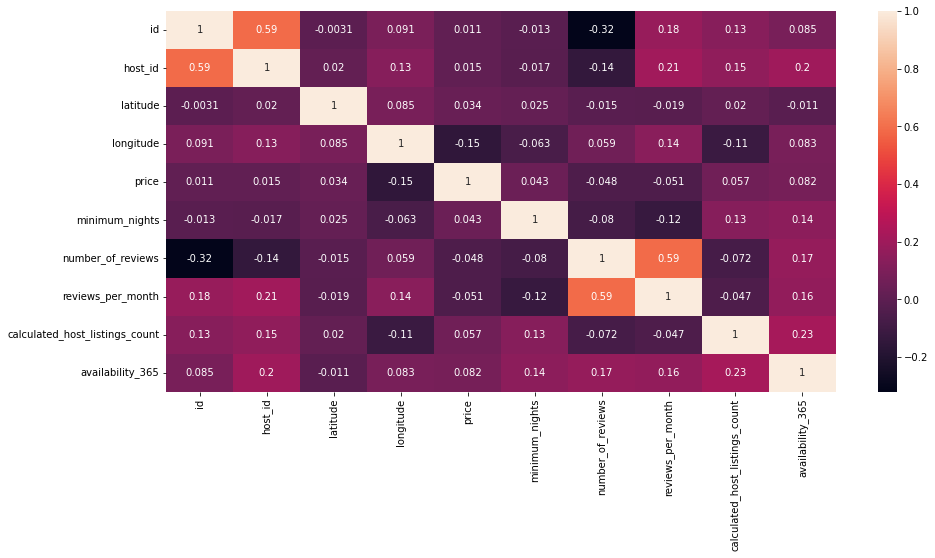

In [24]:
#Coorelation between different values in the table
corr=Airbnb.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

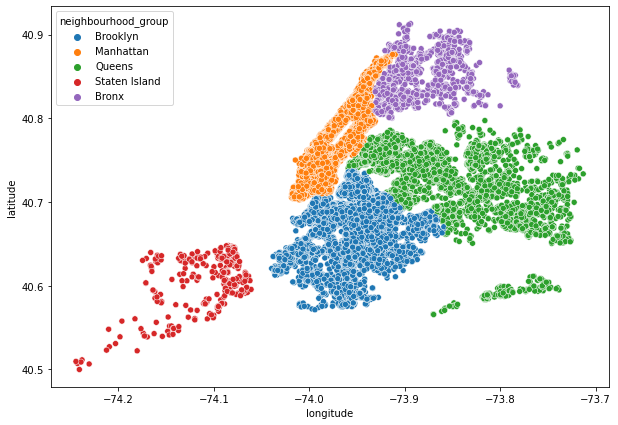

In [25]:
#Given the longitude and latitude, Let us use codes to draw the rough map of all the houses in AirBnB.
plt.figure(figsize=(10,7))
sns.scatterplot(x=Airbnb.longitude,y=Airbnb.latitude,hue=Airbnb['neighbourhood_group'])

Now, we will try to do the Housing Price Prediction. We will be using Linear Regression for predicting the prices. 

Simple Linear Regression Model

In [51]:
#Importing the packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [52]:
#We need to encode columns that contain non-numerical values for our model.
#Label Encoding
labelencoder=LabelEncoder()
Airbnb['neighbourhood_group']=labelencoder.fit_transform(Airbnb['neighbourhood_group'])
Airbnb['neigbourhood']=labelencoder.fit_transform(Airbnb['neighbourhood'])
Airbnb['room_type']=labelencoder.fit_transform(Airbnb['room_type'])

In [53]:
#Next step is to split the data and categorize which columns are feature variables and which are target variables.
cols=['latitude','longitude','neighbourhood_group','room_type','number_of_reviews','reviews_per_month','calculated_host_listings_count','minimum_nights']
x=Airbnb[cols]
y=Airbnb['price']

In [54]:
#Getting test and training set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=353)

In [55]:
#Model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [56]:
#Predicting Values
y_pred=model.predict(x_test)

In [57]:
#Scores
print('Score for training data',model.score(x_train,y_train))
print('Score for testing data',model.score(x_test,y_test))

#Calculating MSE
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error for testing data is',mse)

Score for training data 0.07196632767675759
Score for testing data 0.10502669505191886
Mean Squared Error for testing data is 36502.151121598945


CONCLUSIONS

Using the linear regression, we can predict the housing price in NYC Airbnb. The Score for training and testing data is 7% and 10.5% respectively with a high mean squared error. As we can see, the predictions and results are not good and far from actual prices. We can try out other models like Random Forest etc.,to see if the accuracy score increases and better predictions are made.

With this we have come to the end of this analysis.

THANK YOU!